# A4 Instacart Pt. III

# Contents
## Import
load libraries  
set path and display options  
Load data  
## Pre-analysis processing
### Spend tables
Create spend group  
Create region and profile summary  
## Analysis
### 6. Distribution of Profiles (Task)
Orders per Profile  
Users per Profile  
### 7. Aggregate on profile level (Task)
 Aggregate on Profile and Region  
 Aggregate stats per flag column  
-income  
-age  
-family size   
-pet  
-loyalty  
-fam status  
## 8. Compare Profiles with Region and Dept (Task)
Region and Profile  
Profile and Dept  
Crosstab Profile comparison  
## Visualizations
### Single-Attribute
Orders per Region  
Users per Region  
Mean Total Spend per Profile  
Mean Total Spend per Region  
Orders per Dept  
### Multi-Attribute
Orders per Customer Profile by Region  
Mean Total Spend per Profile by Region  
Mean total Spend per Region by Profile  
Orders per Dept by Customer Profile  


## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
# Our dataframe is pretty wide. 
pd.set_option("display.max_columns", None)

In [3]:
# Color formatting options for visuals
# Set plot bckgd colors
#sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})

In [4]:
# Path variable to our project folder
path = r'D:\2021 CareerFoundry Course\Immersion\Instacart Basket Analysis A4'

In [5]:
# Read pickle file to df
ords_active_profiles = pd.read_pickle(os.path.join(path, '02 Data', 'Processed', 'ords_active_prof2.pkl'))

In [6]:
ords_active_profiles

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_user_last_ordered,Repeat_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_hour,max_order,loyalty_flag,mean_price,spend_flag,median_freq,order_freq_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,pet_owner,age_group,income_group,family_size,customer_profile,department
0,2539329,1,1,2,8,NaN,False,196,1,0,Soda,77,7,9.0,Mid,Regularly busy,Regular days,Average,10,New customer,6.367188,Low,20.5,Low,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,no pets,Adult,mid income,parent,Adult mid income parent,beverages
1,2398795,1,2,3,7,15.0,True,196,1,1,Soda,77,7,9.0,Mid,Regularly busy,Slowest days,Average,10,New customer,6.367188,Low,20.5,Low,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,no pets,Adult,mid income,parent,Adult mid income parent,beverages
2,473747,1,3,3,12,21.0,True,196,1,1,Soda,77,7,9.0,Mid,Regularly busy,Slowest days,Busy,10,New customer,6.367188,Low,20.5,Low,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,no pets,Adult,mid income,parent,Adult mid income parent,beverages
3,2254736,1,4,4,7,29.0,True,196,1,1,Soda,77,7,9.0,Mid,Least busy,Slowest days,Average,10,New customer,6.367188,Low,20.5,Low,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,no pets,Adult,mid income,parent,Adult mid income parent,beverages
4,431534,1,5,4,15,28.0,True,196,1,1,Soda,77,7,9.0,Mid,Least busy,Slowest days,Busy,10,New customer,6.367188,Low,20.5,Low,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Active,no pets,Adult,mid income,parent,Adult mid income parent,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30964559,3308056,106143,22,4,20,10.0,True,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid,Least busy,Slowest days,Average,26,Regular customer,10.703125,High,7.0,High,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Active,no pets,Young Adult,mid income,non-parent,Default,beverages
30964560,2988973,106143,23,2,22,5.0,True,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid,Regularly busy,Regular days,Average,26,Regular customer,10.703125,High,7.0,High,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Active,no pets,Young Adult,mid income,non-parent,Default,beverages
30964561,930,106143,24,6,12,4.0,True,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid,Regularly busy,Regular days,Busy,26,Regular customer,10.703125,High,7.0,High,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Active,no pets,Young Adult,mid income,non-parent,Default,beverages
30964562,467253,106143,25,6,16,7.0,True,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid,Regularly busy,Regular days,Busy,26,Regular customer,10.703125,High,7.0,High,Male,Hawaii,25,5/26/2017,0,single,53755,both,West,Active,no pets,Young Adult,mid income,non-parent,Default,beverages


# Pre-Analysis Processing

## Spend

In [7]:
# aggregate prices sum per account, resulting in total spent across all orders
spend = ords_active_profiles.groupby(['user_id'], as_index=False)['prices'].agg(sum)

In [8]:
# Join customer profile and region to the total spend df
spend_grp = pd.merge(left=spend, right=ords_active_profiles[['user_id','customer_profile', 'region']],
                     how='left', on='user_id')


In [9]:
spend_grp.head()

,user_id,prices,customer_profile,region
0,1,375.7,Adult mid income parent,South
1,1,375.7,Adult mid income parent,South
2,1,375.7,Adult mid income parent,South
3,1,375.7,Adult mid income parent,South
4,1,375.7,Adult mid income parent,South


In [10]:

# The last step created bunch of duplicates which need to be dropped
spend_grp.drop_duplicates(inplace = True)

In [11]:
spend_grp.head()

,user_id,prices,customer_profile,region
0,1,375.7,Adult mid income parent,South
59,2,1465.6,Senior mid income parent,West
254,3,721.4,Adult mid income parent,West
342,4,147.7,Adult mid income parent,South
360,7,1538.2,Adult mid income parent,Northeast


In [12]:
# Calculate average spend and userID count per customer profile
spend_grp.groupby(['customer_profile']).agg({'prices': ['median','mean'], 
                                                      'user_id': ['count']})

prices              user_id
                               median         mean   count
customer_profile                                          
Adult high income parent       1006.0  1603.037533   14254
Adult mid income non-parent     846.8  1436.898136   14213
Adult mid income parent         854.9  1455.807393   42457
Default                         888.2  1478.741744   27865
Senior high income parent       984.7  1602.922330   16140
Senior mid income parent        821.4  1392.379282   25755
Young Adult mid income parent   900.9  1511.626072   21947

In [13]:
region_summary = (spend_grp.groupby(['region']).agg({'prices': ['median','mean'], 
                                                      'user_id': ['count']})).reset_index()

In [14]:
region_summary.head()

region prices              user_id
             median         mean   count
0    Midwest  884.5  1474.218621   38376
1  Northeast  884.1  1487.592271   28581
2      South  888.3  1482.780455   54193
3       West  888.0  1488.547188   41481

In [15]:
# I think I need this for customer profile distribution, actually.
profiles_summary = (spend_grp.groupby(['customer_profile']).agg({'prices': ['median','mean'], 
                                                      'user_id': ['count']})).reset_index()

In [16]:
profiles_summary.head()

customer_profile  prices              user_id
                                median         mean   count
0     Adult high income parent  1006.0  1603.037533   14254
1  Adult mid income non-parent   846.8  1436.898136   14213
2      Adult mid income parent   854.9  1455.807393   42457
3                      Default   888.2  1478.741744   27865
4    Senior high income parent   984.7  1602.922330   16140

# Analysis

## 6.  Distribution of Profiles

### Orders per Profile

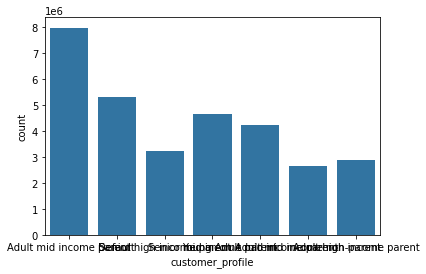

In [17]:
prof_dist = sns.countplot(data=ords_active_profiles, x="customer_profile", color = 'tab:blue')

In [18]:
# Set x ticks to correct rotation, using x axis categories from data as labels
prof_dist.set_xticklabels(prof_dist.get_xticklabels(), rotation=45, ha='right')

#add overall title to plot
prof_dist.set_title('Orders per Customer Profile', color = 'gainsboro')
# Set label for x-axis
prof_dist.set_xlabel( "Customer Profile" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_dist.set_ylabel( "Order Frequency (millions)" , size = 12, color = 'gainsboro' )
# Set  axis color
prof_dist.tick_params(colors='gainsboro', which='both')

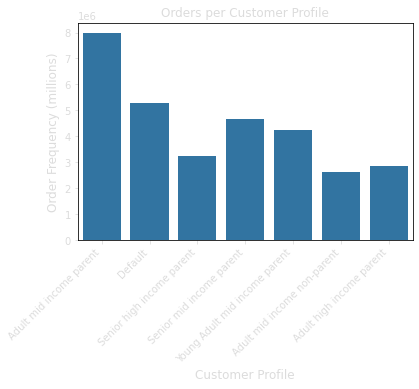

In [19]:
prof_dist.figure

In [20]:
prof_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_distribution.png'))

### Users per  Profile

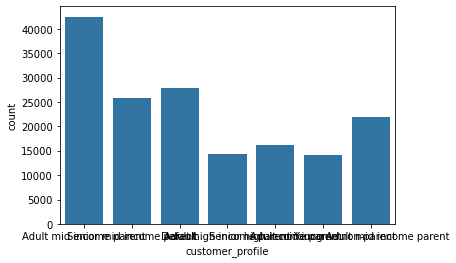

In [21]:
prof_dist_users = sns.countplot(data=spend_grp, x="customer_profile", color = 'tab:blue')

In [22]:
# Set label for x-axis
prof_dist_users.set_xlabel( "Customer Profile" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_dist_users.set_ylabel( "Count of Users" , size = 12, color = 'gainsboro' )
# Set title for plot
prof_dist_users.set_title( "Users per Customer Profile" , size = 15, color = 'gainsboro' )
# Set  axis color
prof_dist_users.tick_params(colors='gainsboro', which='both')


In [23]:
# Set x ticks to correct rotation, using x axis categories from data as labels
prof_dist_users.set_xticklabels(prof_dist_users.get_xticklabels(), rotation=45, ha='right', color = 'white')

[Text(0, 0, 'Adult mid income parent'),
 Text(1, 0, 'Senior mid income parent'),
 Text(2, 0, 'Default'),
 Text(3, 0, 'Adult high income parent'),
 Text(4, 0, 'Senior high income parent'),
 Text(5, 0, 'Adult mid income non-parent'),
 Text(6, 0, 'Young Adult mid income parent')]

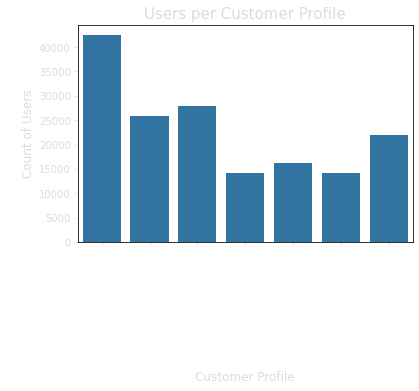

In [24]:
prof_dist_users.figure

In [25]:
prof_dist_users.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'users_profile_distribution.png'))

## 7. Aggregate variables on a customer-profile level

### Aggregating per profile and region

In [26]:
ords_active_profiles.groupby('region').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
               mean median  min   max         mean median min max
region                                                           
Midwest    7.792318    7.4  1.0  25.0    17.602828   12.0   1  99
Northeast  7.781441    7.4  1.0  25.0    17.921760   12.0   1  99
South      7.794439    7.4  1.0  25.0    17.844674   12.0   1  99
West       7.790308    7.4  1.0  25.0    17.971929   12.0   1  99

In [27]:
ords_active_profiles.groupby('customer_profile').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number         \
                                   mean median  min   max         mean median   
customer_profile                                                                
Adult high income parent       7.955380    7.6  1.0  25.0    17.479655   11.0   
Adult mid income non-parent    7.744068    7.3  1.0  25.0    17.970100   12.0   
Adult mid income parent        7.743009    7.3  1.0  25.0    17.923481   12.0   
Default                        7.778623    7.4  1.0  25.0    17.934923   12.0   
Senior high income parent      7.956097    7.7  1.0  25.0    17.948625   12.0   
Senior mid income parent       7.682342    7.3  1.0  25.0    17.611902   12.0   
Young Adult mid income parent  7.804634    7.4  1.0  25.0    17.852479   12.0   

                                       
                              min max  
customer_profile                       
Adult high income parent        1  99  
Adult mid income non-parent     1  99  
Adult mid income parent         1  99  
Default                         1  99  
Senior high income parent       1  99  
Senior mid income parent        1  99  
Young Adult mid income parent   1  99

### Drill down to individual flag level

In [28]:
ords_active_profiles.groupby('income_group').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
                  mean median  min   max         mean median min max
income_group                                                        
high income   7.951193    7.6  1.0  25.0    17.922180   12.0   1  99
low income    6.532603    5.8  1.0  25.0    16.028153   10.0   1  99
mid income    7.742354    7.3  1.0  25.0    17.817306   12.0   1  99

In [29]:
ords_active_profiles.groupby('age_group').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
                 mean median  min   max         mean median min max
age_group                                                          
Adult        7.790417    7.4  1.0  25.0    17.865629   12.0   1  99
Senior       7.795446    7.4  1.0  25.0    17.807616   12.0   1  99
Young Adult  7.782198    7.4  1.0  25.0    17.803483   12.0   1  99

In [30]:
ords_active_profiles.groupby('family_size').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
                 mean median  min   max         mean median min max
family_size                                                        
non-parent   7.789550    7.4  1.0  25.0    17.957922   12.0   1  99
parent       7.790937    7.4  1.0  25.0    17.792891   12.0   1  99

In [31]:
ords_active_profiles.groupby('pet_owner').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
               mean median  min   max         mean median min max
pet_owner                                                        
no pets    7.787939    7.4  1.0  25.0    17.612568   11.0   1  99
pets       7.811730    7.4  1.0  25.0    19.600465   13.0   1  99

In [32]:
ords_active_profiles.groupby(['loyalty_flag']).agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number               
                      mean median  min   max         mean median min max
loyalty_flag                                                            
Loyal customer    7.773575    7.4  1.0  25.0    32.641196   30.0   1  99
New customer      7.801665    7.4  1.0  25.0     4.268295    4.0   1  10
Regular customer  7.798262    7.4  1.0  25.0    12.347452   11.0   1  40

In [33]:
ords_active_profiles.groupby('fam_status').agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                   order_number  \
                                      mean median  min   max         mean   
fam_status                                                                  
divorced/widowed                  7.801014    7.4  1.0  25.0    17.993361   
living with parents and siblings  7.800604    7.4  1.0  25.0    18.000712   
married                           7.790278    7.4  1.0  25.0    17.778735   
single                            7.783597    7.4  1.0  25.0    17.939521   

                                                 
                                 median min max  
fam_status                                       
divorced/widowed                   12.0   1  99  
living with parents and siblings   12.0   1  99  
married                            12.0   1  99  
single                             12.0   1  99

## 8. Compare  customer profiles with regions and departments. 

### Region and Profile

In [34]:
# Descriptive price and order frequency stats per region, per profile
ords_active_profiles.groupby(['customer_profile', 'region']).agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                    \
                                             mean median  min   max   
customer_profile              region                                  
Adult high income parent      Midwest    7.952574    7.7  1.0  25.0   
                              Northeast  7.936692    7.6  1.0  25.0   
                              South      7.973821    7.7  1.0  25.0   
                              West       7.948155    7.6  1.0  25.0   
Adult mid income non-parent   Midwest    7.753060    7.3  1.0  25.0   
                              Northeast  7.722787    7.3  1.0  25.0   
                              South      7.746601    7.3  1.0  25.0   
                              West       7.746619    7.3  1.0  25.0   
Adult mid income parent       Midwest    7.740225    7.3  1.0  25.0   
                              Northeast  7.739850    7.3  1.0  25.0   
                              South      7.747953    7.3  1.0  25.0   
                              West       7.741245    7.3  1.0  25.0   
Default                       Midwest    7.772937    7.3  1.0  25.0   
                              Northeast  7.780918    7.4  1.0  25.0   
                              South      7.786901    7.4  1.0  25.0   
                              West       7.771336    7.3  1.0  25.0   
Senior high income parent     Midwest    7.938822    7.6  1.0  25.0   
                              Northeast  7.972857    7.6  1.0  25.0   
                              South      7.953279    7.6  1.0  25.0   
                              West       7.964027    7.7  1.0  25.0   
Senior mid income parent      Midwest    7.686177    7.3  1.0  25.0   
                              Northeast  7.666242    7.3  1.0  25.0   
                              South      7.685475    7.3  1.0  25.0   
                              West       7.685824    7.3  1.0  25.0   
Young Adult mid income parent Midwest    7.828514    7.4  1.0  25.0   
                              Northeast  7.766147    7.3  1.0  25.0   
                              South      7.803059    7.4  1.0  25.0   
                              West       7.810998    7.4  1.0  25.0   

                                        order_number                 
                                                mean median min max  
customer_profile              region                                 
Adult high income parent      Midwest      17.649606   12.0   1  99  
                              Northeast    17.439230   11.0   1  99  
                              South        17.142147   11.0   1  99  
                              West         17.768062   12.0   1  99  
Adult mid income non-parent   Midwest      17.617903   12.0   1  99  
                              Northeast    17.326116   11.0   1  99  
                              South        18.006306   12.0   1  99  
                              West         18.664748   12.0   1  99  
Adult mid income parent       Midwest      17.687404   12.0   1  99  
                              Northeast    18.079417   12.0   1  99  
                              South        17.881708   12.0   1  99  
                              West         18.086013   12.0   1  99  
Default                       Midwest      18.064380   12.0   1  99  
                              Northeast    17.815598   12.0   1  99  
                              South        17.993915   12.0   1  99  
                              West         17.818994   12.0   1  99  
Senior high income parent     Midwest      17.750898   12.0   1  99  
                              Northeast    18.158901   12.0   1  99  
                              South        18.082179   12.0   1  99  
                              West         17.808056   12.0   1  99  
Senior mid income parent      Midwest      16.969326   11.0   1  99  
                              Northeast    17.621503   12.0   1  99  
                              South        17.690827   12.0   1  99  
                     

### Profile and Depts

In [35]:
# Descriptive price and order frequency stats per department, per profile
ords_active_profiles.groupby(['customer_profile', 'department_id']).agg({'prices': ['mean', 'median', 'min', 'max'], 
                                                      'order_number': ['mean', 'median', 'min', 'max']})

prices                    \
                                                 mean median  min   max   
customer_profile              department_id                               
Adult high income parent      1              7.847015    8.0  1.0  15.0   
                              2              7.504946    7.5  1.1  15.0   
                              3              7.895708    7.5  1.0  15.0   
                              4              8.078039    8.2  1.0  15.0   
                              5              8.411691    7.8  1.0  15.0   
...                                               ...    ...  ...   ...   
Young Adult mid income parent 17             7.363301    7.3  1.0  15.0   
                              18             7.661515    7.2  1.0  15.0   
                              19             4.281695    4.3  1.6   7.0   
                              20             7.777596    7.5  1.0  15.0   
                              21             8.619387    8.4  1.0  15.0   

                                            order_number                 
                                                    mean median min max  
customer_profile              department_id                              
Adult high income parent      1                15.904725   10.0   1  99  
                              2                18.306584   12.0   1  99  
                              3                17.470741   11.0   1  99  
                              4                18.201466   12.0   1  99  
                              5                14.728521   10.0   1  99  
...                                                  ...    ...  ..  ..  
Young Adult mid income parent 17               16.282919   11.0   1  99  
                              18               19.665877   13.0   1  99  
                              19               17.893007   12.0   1  99  
                              20               17.235406   11.0   1  99  
                              21               24.661357   19.0   1  99  

[147 rows x 8 columns]

### Crosstab profile comparison

In [36]:
# Create cross of profiles with region
prf_region_cross = pd.crosstab(ords_active_profiles['customer_profile'], ords_active_profiles['region'],
                       dropna = False)

In [37]:
# Display
prf_region_cross

region,Midwest,Northeast,South,West
customer_profile,,,,
Adult high income parent,693583,517781,920861,741501
Adult mid income non-parent,624109,450284,874574,688289
Adult mid income parent,1859642,1415048,2676704,2031437
Default,1251297,937917,1774713,1335014
Senior high income parent,765579,581961,1082834,822459
Senior mid income parent,1070899,821501,1557195,1218462
Young Adult mid income parent,996404,740193,1424258,1090065


In [38]:
# Create cross of profiles with dept
prf_dpt_cross = pd.crosstab(ords_active_profiles['customer_profile'], ords_active_profiles['department'],
                       dropna = False)

In [39]:
# Display
prf_dpt_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
Adult high income parent,15003,39091,107199,227469,60487,2749,100121,487642,92107,80378,200461,65625,24703,68937,6088,3053,170505,39471,8888,850650,223099
Adult mid income non-parent,12192,34387,95872,222093,57237,2859,84679,438467,87091,67760,178934,57248,22016,54283,5458,3000,149226,36505,7688,776672,243589
Adult mid income parent,35142,105570,285293,671358,174428,8865,254581,1330579,257780,209456,540872,181060,65326,169035,16518,8586,456329,110847,23022,2333897,744287
Default,27057,70874,192465,445325,113957,5438,171586,885722,172591,140866,364652,119944,43881,113900,10776,6081,304242,72598,16566,1543582,476838
Senior high income parent,14831,45236,121969,259736,68811,3272,111552,551660,106258,89051,226222,73541,26979,77512,6994,3709,191375,44197,9864,969762,250302
Senior mid income parent,20898,59093,164528,401788,102115,5470,148473,766951,150003,120608,318200,108490,37597,97556,9706,5049,266294,63077,13862,1355518,452781
Young Adult mid income parent,19504,56141,153502,344132,93815,4798,141082,716161,138004,114017,292390,93949,35489,93558,9228,4933,244734,57611,13170,1249192,375510


# Visualizations

## Single-attribute viz

### Orders per Region

<AxesSubplot:xlabel='region'>

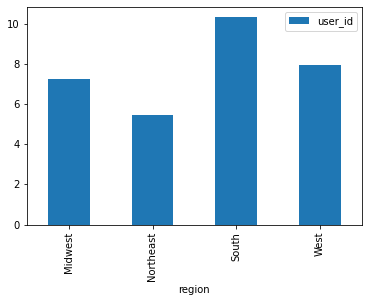

In [40]:
(ords_active_profiles[['region', 'user_id']].groupby(['region']).count()/1000000).plot.bar(color = 'tab:blue')

In [41]:
df = (ords_active_profiles[['region', 'user_id']].groupby(['region']).count()/1000000)

In [42]:
df = df.reset_index()

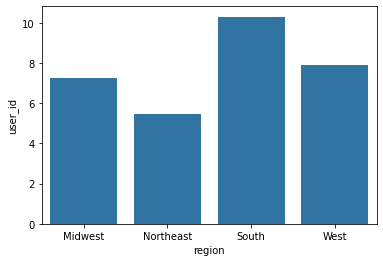

In [43]:
prof_regionz = sns.barplot(data=df, x="region", y='user_id', color = 'tab:blue')

In [44]:
#add overall title to plot
prof_regionz.set_title('Total Orders per Region', color = 'gainsboro')
# Set label for x-axis
prof_regionz.set_xlabel( "Region" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_regionz.set_ylabel( "Count of Orders (millions)" , size = 12, color = 'gainsboro' )
# Set axis color
prof_regionz.tick_params(colors='gainsboro', which='both')

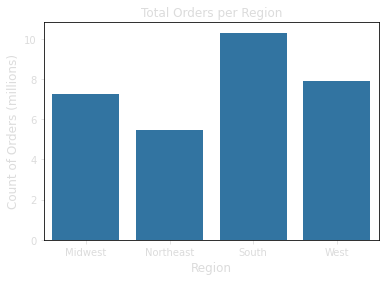

In [45]:
prof_regionz.figure

In [46]:
# Export
prof_regionz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prof_regionz.png'))

### Users per Region

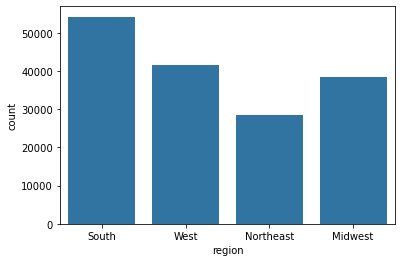

In [47]:
reg_dist_users = sns.countplot(data=spend_grp, x="region", color = 'tab:blue')

In [48]:
#add overall title to plot
reg_dist_users.set_title('Total Users per Region', color = 'gainsboro')
# Set label for x-axis
reg_dist_users.set_xlabel( "Region" , size = 12, color = 'gainsboro' )
# Set label for y-axis
reg_dist_users.set_ylabel( "Count of Users" , size = 12, color = 'gainsboro' )
# Set  axis color
reg_dist_users.tick_params(colors='gainsboro', which='both')

In [49]:
# Export
reg_dist_users.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_dist_users.png'))

### Mean total spend by Profile

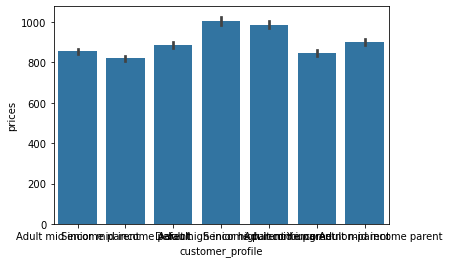

In [50]:
prof_mean_spend = sns.barplot(data=spend_grp, x="customer_profile", y = 'prices', color = 'tab:blue',
                                 estimator = np.median)

In [51]:
# Set x ticks to correct rotation, using x axis categories from data as labels
prof_mean_spend.set_xticklabels(prof_mean_spend.get_xticklabels(), rotation=45, ha='right')

#add overall title to plot
prof_mean_spend.set_title('Mean Total Spend per Customer Profile', color = 'gainsboro')
# Set label for x-axis
prof_mean_spend.set_xlabel( "Customer Profile" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_mean_spend.set_ylabel( "Mean Total Spend (USD)" , size = 12, color = 'gainsboro' )
# Set  axis color
prof_mean_spend.tick_params(colors='gainsboro', which='both')

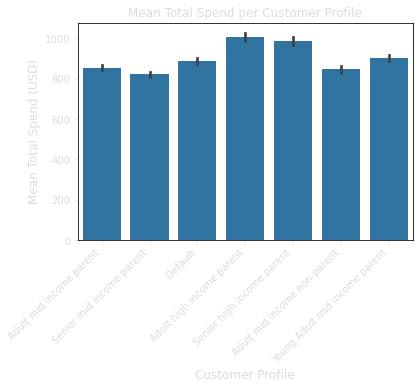

In [52]:
prof_mean_spend.figure

In [53]:
prof_mean_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prof_mean_spend.png'))

#### Mean total spend by Region

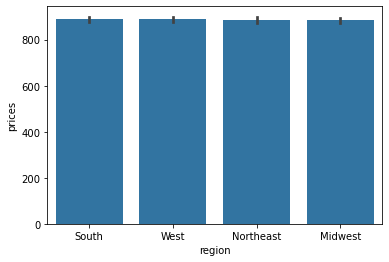

In [54]:
regi_mean_spend = sns.barplot(data=spend_grp, x="region", y = 'prices', color = 'tab:blue',
                                 estimator = np.median)

In [55]:
#add overall title to plot
regi_mean_spend.set_title('Mean Total Spend per Region', color = 'gainsboro')
# Set label for x-axis
regi_mean_spend.set_xlabel( "Region" , size = 12, color = 'gainsboro' )
# Set label for y-axis
regi_mean_spend.set_ylabel( "Mean Total Spend (USD)" , size = 12, color = 'gainsboro' )
# Set  axis color
regi_mean_spend.tick_params(colors='gainsboro', which='both')

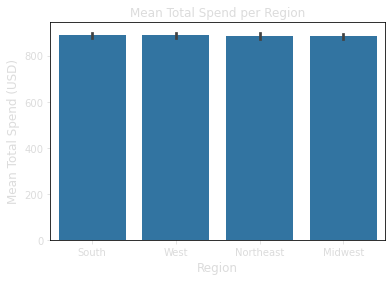

In [56]:
regi_mean_spend.figure

In [57]:
regi_mean_spend.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regi_mean_spend.png'))

### Orders per Department

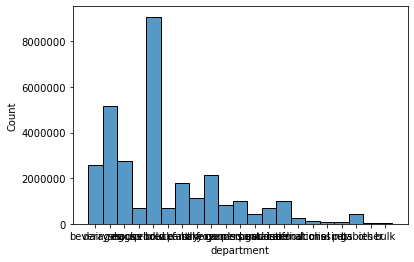

In [58]:
ords_dept = sns.histplot(data=ords_active_profiles, x="department")
plt.ticklabel_format(style='plain', axis='y')

In [59]:
ords_dept.set_xticklabels(ords_dept.get_xticklabels(), rotation=45, ha='right')
#add overall title to plot
ords_dept.set_title('Orders per Department', color = 'gainsboro')
# Set label for x-axis
ords_dept.set_xlabel( "Department" , size = 12, color = 'gainsboro' )
# Set label for y-axis
ords_dept.set_ylabel( "Count of Orders (millions)" , size = 12, color = 'gainsboro' )
# Set  axis color
ords_dept.tick_params(colors='gainsboro', which='both')

C:\Users\MCQUII\AppData\Local\Temp/ipykernel_13768/4170254870.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ords_dept.set_xticklabels(ords_dept.get_xticklabels(), rotation=45, ha='right')


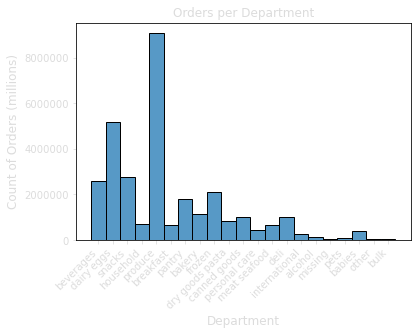

In [60]:
ords_dept.figure

In [61]:
# Export Figure
ords_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_dept.png'))

## Multi-attribute viz

### Orders per Customer Profile by Region

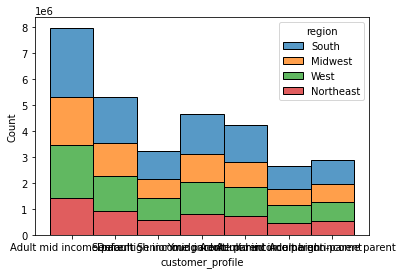

In [62]:
# Orders per profile by region
prof_region = sns.histplot(data=ords_active_profiles, x="customer_profile", hue="region", multiple="stack")

In [63]:
# Set x ticks to correct rotation, using x axis categories from data as labels
prof_region.set_xticklabels(prof_region.get_xticklabels(), rotation=45, ha='right')

#add overall title to plot
prof_region.set_title('Orders per Customer Profile by Region', color = 'gainsboro')
# Set label for x-axis
prof_region.set_xlabel( "Customer Profile" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_region.set_ylabel( "Count of Users (millions)" , size = 12, color = 'gainsboro' )
# Set  axis color
prof_region.tick_params(colors='gainsboro', which='both')

C:\Users\MCQUII\AppData\Local\Temp/ipykernel_13768/2747096118.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  prof_region.set_xticklabels(prof_region.get_xticklabels(), rotation=45, ha='right')


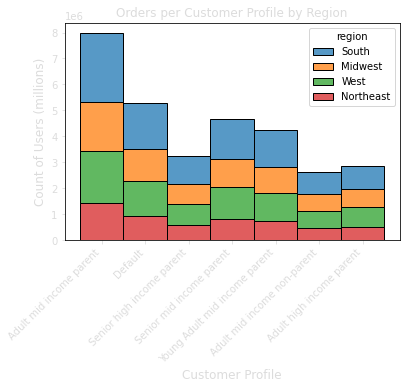

In [64]:

# Display properly labelled figure
prof_region.figure

In [65]:
# Export Figure
prof_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_regions.png'))

#### Mean Total Spend per Profile by Region

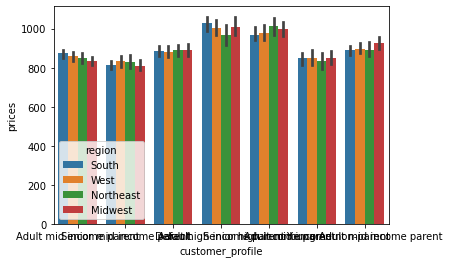

In [66]:
# This figure breaks out median spend per cust. profile and region
profile_total_spend_p = sns.barplot(data=spend_grp, x="customer_profile", y = 'prices', hue = 'region',
                                 estimator = np.median)

In [67]:
# Fix labels
profile_total_spend_p.set_xticklabels(profile_total_spend_p.get_xticklabels(), rotation=45, ha='right')

#add overall title to plot
profile_total_spend_p.set_title('Mean Total Spend per Profile by Region', color = 'gainsboro')
# Set  axis color
profile_total_spend_p.tick_params(colors='gainsboro', which='both')

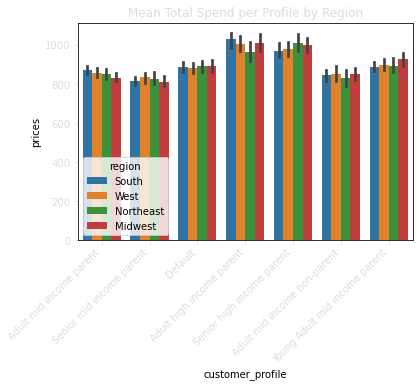

In [68]:
# Print figure
profile_total_spend_p.figure

In [69]:
# Export Figure
profile_total_spend_p.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_total_spend_p.png'))

#### Mean Total Spend per Region by Profile

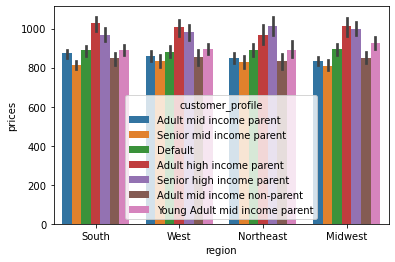

In [70]:
# This figure breaks out median spend per cust. region

profile_total_spend_r = sns.barplot(data=spend_grp, x="region", y = 'prices', hue = 'customer_profile',
                                 estimator = np.median)

In [71]:
# Fix labels
profile_total_spend_r.set_xticklabels(profile_total_spend_r.get_xticklabels(), rotation=45, ha='right')

#add overall title to plot
profile_total_spend_r.set_title('Mean Total Spend per Region by Profile', color = 'gainsboro')
# Set  axis color
profile_total_spend_r.tick_params(colors='gainsboro', which='both')

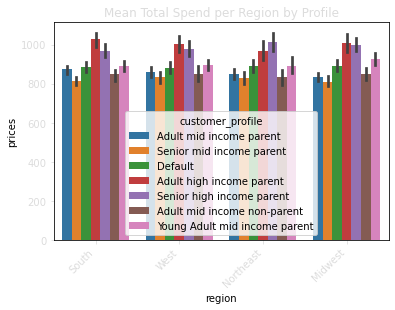

In [72]:
profile_total_spend_r.figure

In [73]:
# Export Figure
profile_total_spend_r.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_total_spend_r.png'))

### Orders per Dept by Customer Profile

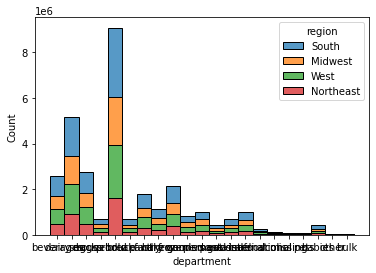

In [74]:
# Create plot
prof_dept = sns.histplot(data=ords_active_profiles, x="department", hue = 'region', multiple = 'stack')

In [75]:
prof_dept.set_xticklabels(prof_dept.get_xticklabels(), rotation=45, ha='right', color = 'gainsboro')
#add overall title to plot
prof_dept.set_title('Orders per Department by Customer Profile', color = 'gainsboro')
# Set label for x-axis
prof_dept.set_xlabel( "Department" , size = 12, color = 'gainsboro' )
# Set label for y-axis
prof_dept.set_ylabel( "Count of Orders (millions)" , size = 12, color = 'gainsboro' )
# Set  axis color
prof_dept.tick_params(colors='gainsboro', which='both')

C:\Users\MCQUII\AppData\Local\Temp/ipykernel_13768/3501278141.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  prof_dept.set_xticklabels(prof_dept.get_xticklabels(), rotation=45, ha='right', color = 'gainsboro')


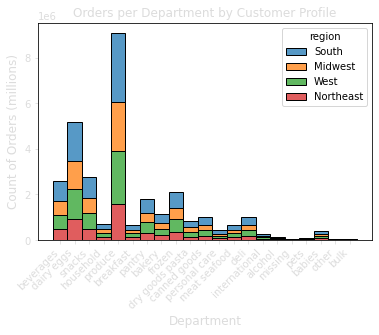

In [76]:
prof_dept.figure

In [77]:
# Export Figure
prof_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profiles_depts_profiles.png'))

# Conclusions to support


Users are primarily adult or senior parents with mid-high income.  
  
Spending per account (mean or median) is relatively constant across regions. Some exceptions exist for specific profile groups.  
  
Spending per account among profiles appears mainly tied to income levels. This is the primary differentiator in whole-profile groupings, and when broken down to individual flags, this is one of the few with actual visibile differences